In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\86151\Downloads\digit recognizer\train.csv")

In [2]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [3]:
x.shape

(42000, 784)

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#filter

In [6]:
#variance threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()#default = 0
x_var0 = selector.fit_transform(x)
x_var0.shape

(42000, 708)

In [7]:
import numpy as np
x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)
x_fsvar.shape

(42000, 392)

In [8]:
x_bvar = VarianceThreshold(0.8*0.2).fit_transform(x)
x_bvar.shape

(42000, 685)

In [9]:
# chi square filter
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
x_fschi = SelectKBest(chi2, k=300).fit_transform(x_fsvar,y)
x_fschi.shape

(42000, 300)

In [11]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()

0.9344761904761905

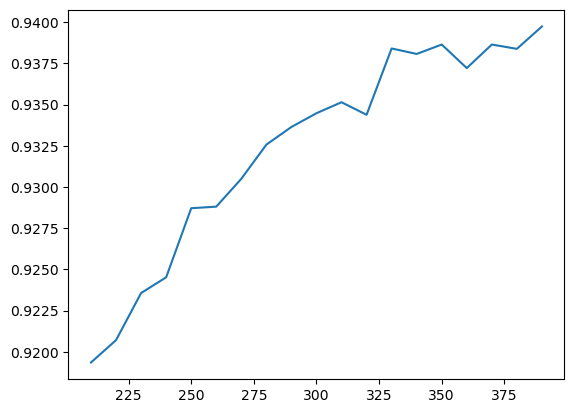

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
score = []
for i in range(390,200,-10):
    x_fschi = SelectKBest(chi2, k=i).fit_transform(x_fsvar,y)
    sc = cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()
    score.append(sc)
plt.plot(range(390,200,-10),score)
plt.show()

In [14]:
chivalue,pvalue = chi2(x_fsvar,y)
chivalue

array([ 945664.84392645, 1244766.05139167, 1554872.30384529,
       1834161.78305348, 1903618.94085299, 1845226.62427203,
       1602117.23307541,  708535.17489839,  974050.2051372 ,
       1188092.19961933, 1319151.4346704 , 1397847.88367963,
       1433554.26798019, 1429043.15373436, 1332663.17213408,
       1101423.25372263,  809989.56940487,  519266.71772285,
        285681.88297156,  191589.23696469,  902883.12552642,
       1237265.16042376, 1503477.73699159, 1625807.41495546,
       1630206.9092292 , 1630597.02883808, 1633456.72909668,
       1610816.75571233, 1483382.4954389 , 1256290.15747943,
        951236.16176823,  693192.66191749,  532386.96220362,
        504617.38933716,  575090.36046245,  501025.03733246,
        802341.10683196, 1078344.87244063, 1226540.98318705,
       1269945.07968834, 1221758.57688811, 1146535.17810244,
       1080657.20185306, 1079065.30979138, 1092222.70610035,
       1064908.45385719, 1023327.00231069,  974163.15420168,
        918857.12860619,

In [15]:
pvalue

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
k0 = chivalue.shape[0] - (pvalue > 0.05).sum()

In [18]:
x_fschi = SelectKBest(chi2, k=k0).fit_transform(x_fsvar,y)
x_fschi.shape

(42000, 392)

In [19]:
#F test
from sklearn.feature_selection import f_classif
F,pvalue_f = f_classif(x_fsvar,y)

In [20]:
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [21]:
pvalue_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [22]:
k1 = F.shape[0] - (pvalue_f > 0.05).sum()

In [23]:
x_fschi = SelectKBest(chi2, k=k1).fit_transform(x_fsvar,y)
x_fschi.shape

(42000, 392)

In [24]:
# mutual info
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(x_fsvar,y)
result

array([0.06326938, 0.09320537, 0.10348602, 0.11342103, 0.11974939,
       0.10050588, 0.08012035, 0.05775896, 0.07272428, 0.0921866 ,
       0.12051089, 0.13868889, 0.16229087, 0.16375945, 0.14730933,
       0.1190776 , 0.08679157, 0.05602279, 0.03749567, 0.02187761,
       0.0657071 , 0.10047445, 0.12085215, 0.14979025, 0.17890051,
       0.20549569, 0.22685826, 0.23199675, 0.21378765, 0.18238786,
       0.13558346, 0.10058187, 0.07764376, 0.05490707, 0.04964452,
       0.03801357, 0.05682894, 0.07249172, 0.10678922, 0.12285586,
       0.13406273, 0.14321121, 0.16918494, 0.18415283, 0.18481548,
       0.17197328, 0.14794339, 0.13340469, 0.10723229, 0.09541096,
       0.08549711, 0.06947356, 0.06257443, 0.04308107, 0.05744849,
       0.07233364, 0.09143161, 0.09331308, 0.11072783, 0.1088577 ,
       0.11006601, 0.11458005, 0.11379672, 0.12055178, 0.10946259,
       0.12055332, 0.11684674, 0.11225213, 0.09886914, 0.07290477,
       0.06956754, 0.0412913 , 0.05007121, 0.06797062, 0.07703

In [25]:
k3 = result.shape[0] - sum(result<=0)
k3

392

In [27]:
#embedded
from sklearn.feature_selection import SelectFromModel
RFC_ = RFC(n_estimators=10,random_state=0)
x_embedded = SelectFromModel(RFC_, threshold = 0.005).fit_transform(x,y)
x_embedded.shape

(42000, 47)

In [28]:
RFC_.fit(x,y).feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.96726660e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.39623410e-06,
       7.35101726e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.70425050e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.09114204e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

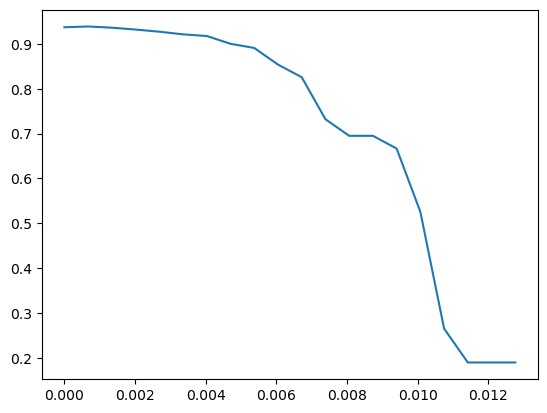

In [30]:
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_, threshold = i).fit_transform(x,y)
    sc = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score.append(sc)
plt.plot(threshold,score)
plt.show()

In [34]:
x_embedded = SelectFromModel(RFC_, threshold = 0.00067).fit_transform(x,y)
x_embedded.shape

(42000, 324)

In [35]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

0.9391190476190475

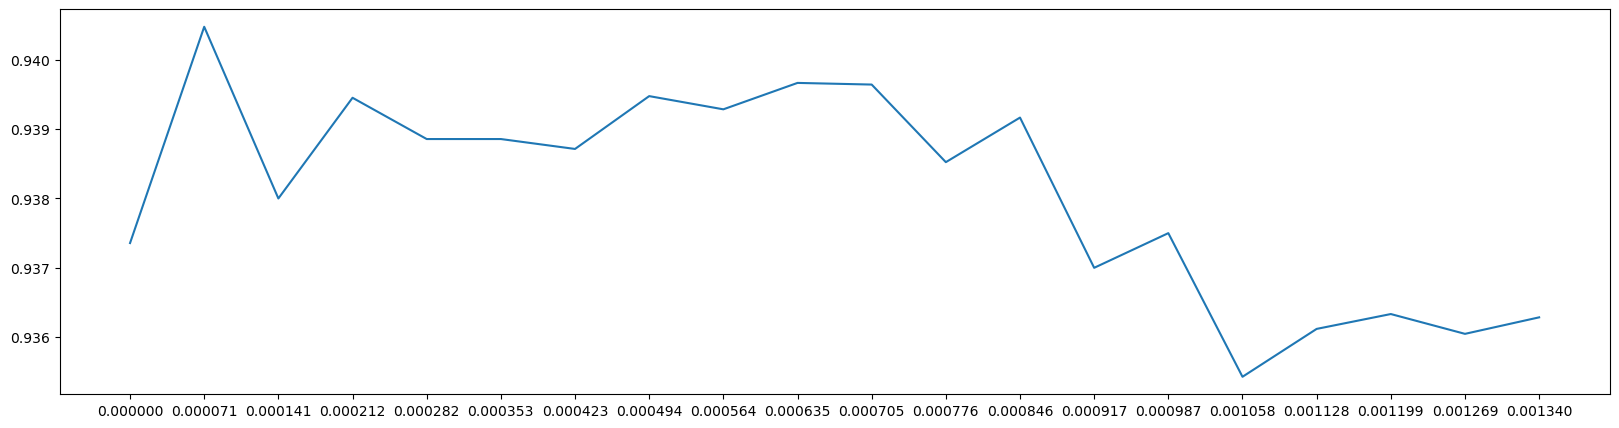

In [33]:
score2 = []
for i in np.linspace(0,0.00134,20):
    x_embedded = SelectFromModel(RFC_, threshold = i).fit_transform(x,y)
    sc2 = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(sc2)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()

In [40]:
x_embedded = SelectFromModel(RFC_, threshold = 0.000635).fit_transform(x,y)
x_embedded.shape

(42000, 331)

In [41]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

0.9396666666666667

In [42]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

0.9641190476190475

In [43]:
#wrapper
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=340,step=50).fit(x,y)
selector.support_.sum()

340

In [44]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [46]:
x_wrapper = selector.transform(x)
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.9379761904761905

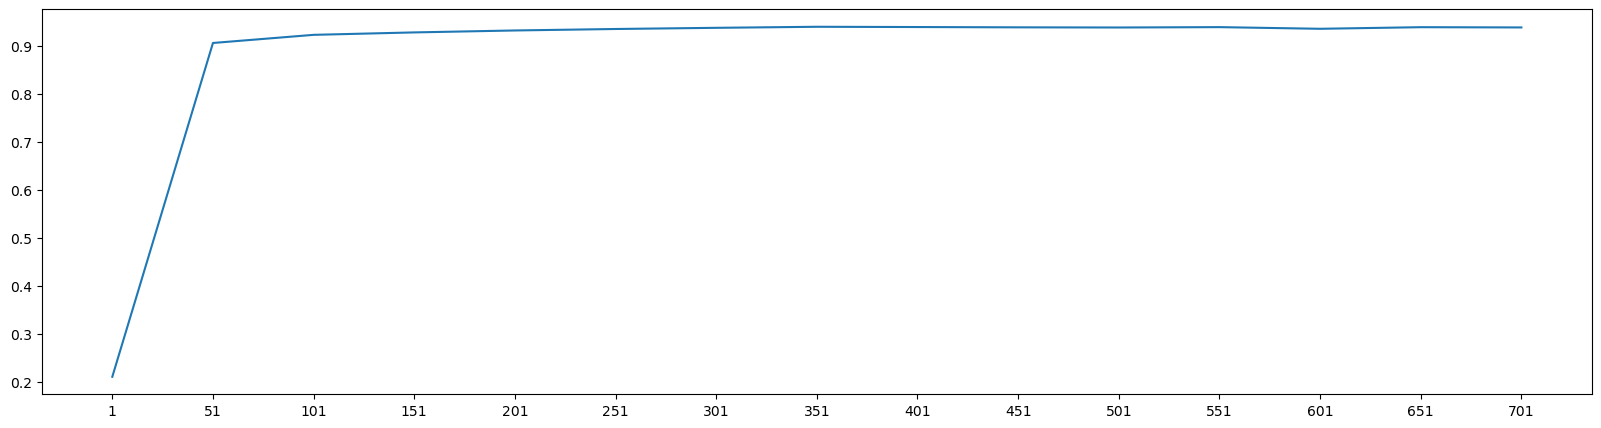

In [48]:
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i,step=50).fit_transform(x,y)
    sc = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(sc)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()

In [49]:
x_wrapper = RFE(RFC_,n_features_to_select=251,step=50).fit_transform(x,y)
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.9357857142857142